## - Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## - Load Datasets

In [5]:
# Load groups data in csv format, set csv separator and decimal symbol
example = pd.read_csv('data/example.csv',sep= ',', decimal= '.')

In [6]:
# Check if data was loaded correctly
example.head()

,Condition 1,Condition 2
0,2.36070,1.733200
1,0.89915,0.514057
2,2.58052,2.803750
3,2.28854,1.092860
4,1.18224,0.470779


## - Make graph

#### POSSIBLE COLOR COMBINATIONS FOR DIFFERENT GROUPS

- group1: palevioletred, crimson
- group2: royalblue, navy
- group3: limegreen, forestgreen
- group4: goldenrod, darkgoldenrod
- group5: mediumorchid, rebeccapurple

In [7]:
dataset= example # this works in case you want to plot different paired groups 
N = len(dataset)
cond1 = dataset.columns[0]
cond2 = dataset.columns[1]

# get medians and quartiles for both groups
median1 = dataset[cond1].median()
median2 = dataset[cond2].median()
q25_1 = dataset[cond1].quantile(0.25)
q25_2 = dataset[cond2].quantile(0.25)
q75_1 = dataset[cond1].quantile(0.75)
q75_2 = dataset[cond1].quantile(0.75)

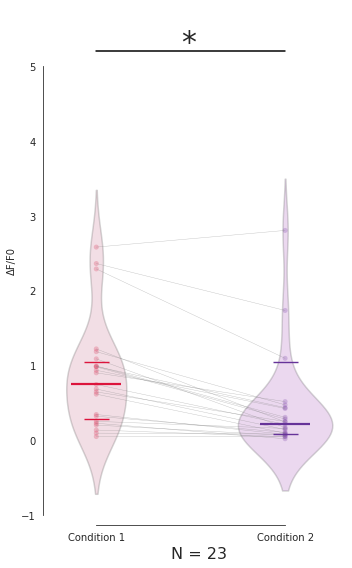

In [8]:
# Set graph properties
sns.set_style("white")
plt.figure(figsize=(5, 8))

# stripplot for the dots
sns.stripplot(data= dataset, palette= ['crimson', 'rebeccapurple' ], jitter = False, alpha= 1, zorder= 1)

# violinplot (if you just want the paired dots you can delete this)
ax= sns.violinplot(data= dataset, palette = ['palevioletred', 'mediumorchid'], zorder= 2, width= 0.5, inner= None)

# Plot the lines between the dots
for i in range(len(dataset[cond1])):
    plt.plot( [0,1], [dataset[cond1][i], dataset[cond2][i]], c='gray', lw='0.4', alpha=0.5, zorder= 1)

# Medians and quartiles markers
plt.plot(0, median1, marker='_', markersize= 50, mew=2.2, color= 'crimson')
plt.plot(1, median2, marker='_', markersize= 50, mew=2.2, color= 'rebeccapurple')
plt.plot(0, q25_1, marker='_', markersize= 25, mew=1.4, color= 'crimson')
plt.plot(1, q25_2, marker='_', markersize= 25, mew=1.4, color= 'rebeccapurple')
plt.plot(0, q75_1, marker='_', markersize= 25, mew=1.4, color= 'crimson')
plt.plot(1, q75_2, marker='_', markersize= 25, mew=1.4, color= 'rebeccapurple')

# Set y limits and labels
plt.ylim(-1, 5.8) #5.8
plt.xlabel(f'N = {N}', fontsize= 16)
plt.ylabel('ΔF/F0')

# If you want to show a statistical significant difference between groups:
x1, y1 = [0, 1], [5.2, 5.2]
plt.plot(x1, y1, color= 'black', lw='1.5')
plt.text(0.45, 5.2, '*', fontsize='30')

# fine-tune graph aspect
plt.setp(ax.collections, alpha=.25) # this line sets the alpha for the violins
sns.despine(offset=10, trim=True)
plt.tight_layout()

# Save the graph as image
plt.savefig('example.png')